In [1]:
import shap
import torch
import numpy as np

c:\Users\User\anaconda3\envs\python39\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\User\anaconda3\envs\python39\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(al

In [4]:
from ANN_model import Features12_NN
from Dataset import Features12_dataset

model = Features12_NN()
model.load_state_dict(torch.load('Models/features12_model7best.pt'))

X = np.load('Numeric_feature_dataset/features12_train_cleaned.npy')
y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')

train_dataset = Features12_dataset(X, y, train=True, random_state=42)
X_shap, y_shap  = train_dataset[:]
print(X_shap.shape)

torch.Size([9400, 12])


In [6]:
e = shap.DeepExplainer(
        model.cuda(), 
        X_shap.cuda()
        )

In [9]:
x_samples = X_shap[np.random.choice(np.arange(len(X_shap)), 500, replace=False)]
shap_values = e.shap_values(X_shap)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


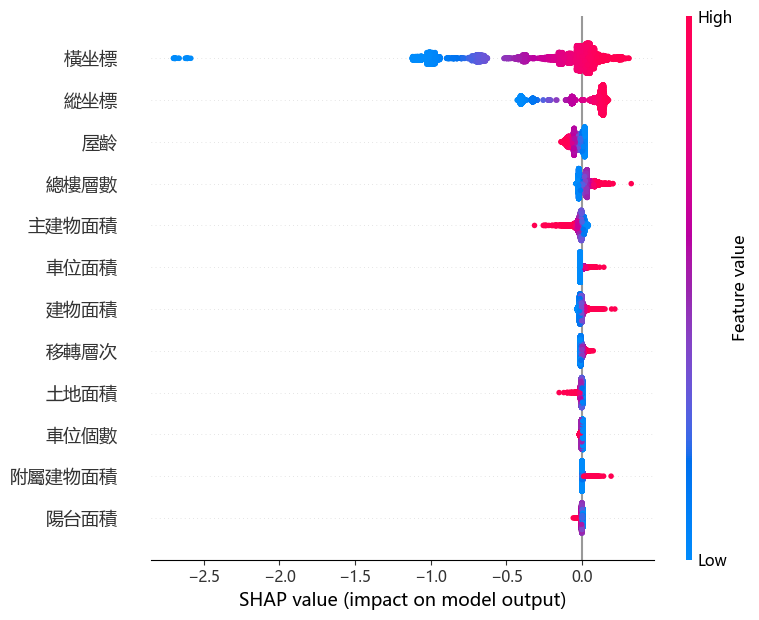

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
shap.summary_plot(shap_values, features=X_shap, feature_names=['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積'])